In [1]:
from keras.datasets import mnist

In [2]:
# 데이터 로드
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images.shape

(60000, 28, 28)

In [3]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [6]:
# 신경망 모델 만들기

from keras import models, layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [7]:
# 컴파일

network.compile(optimizer='rmsprop', \
               loss='categorical_crossentropy', \
               metrics=['accuracy'])

In [8]:
# 이미지 데이터 준비

# (60000, 28*28) = (60000, 784) 크기로 변환
train_images = train_images.reshape((60000, 28 * 28))
print(train_images.shape)  # (60000, 784) <- 초기엔 (60000, 28, 28)
print(train_images.dtype)  # uint8 (0 ~ 255의 값을 가짐)

# 0 ~ 1의 값을 가지는 float32 타입의 배열로 변환
train_images = train_images.astype('float32') / 255
print(train_images.shape)  # (60000, 784)

(60000, 784)
uint8
(60000, 784)


In [9]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [10]:
# 레이블을 범주형으로 인코딩 

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [11]:
# 훈련 데이터에 모델을 학습시키기

# 훈련되는 동안 출력되는 2개의 데이터
# loss: 손실 - accuracy: 정확도
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 0.4313 - accuracy: 0.8728
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1118 - accuracy: 0.9681
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0692 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0482 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0367 - accuracy: 0.9900


In [12]:
# 테스트셋에 대해 모델을 평가

test_loss, test_acc = network.evaluate(test_images, test_labels)

print("test accuracy :", test_acc)

313/313 [==============================] - 0s 910us/step - loss: 0.0718 - accuracy: 0.9785
test accuracy : 0.9785000085830688


In [13]:
# 0D Tensor
import numpy as np

x = np.array(12)
print(x, x.ndim, x.shape)  # 12 0 ()

12 0 ()


In [14]:
# 1D Tensor
x = np.array([12, 3, 6, 14, 7])
print(x, x.ndim, x.shape)  # [12  3  6 14  7] 1 (5,)

[12  3  6 14  7] 1 (5,)


In [15]:
# 2D Tensor
x = np.array([[5, 78, 2, 34, 9],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]])
print(x, x.ndim, x.shape)
"""
[[ 5 78  2 34  9]
 [ 6 79  3 35  1]
 [ 7 80  4 36  2]] 2 (3, 5)
"""

[[ 5 78  2 34  9]
 [ 6 79  3 35  1]
 [ 7 80  4 36  2]] 2 (3, 5)


In [16]:
# 3D Tensor
x = np.array([[[5, 78, 2, 34, 9],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]],
             [[5, 78, 2, 34, 9],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]],
             [[5, 78, 2, 34, 9],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]]])
print(x.ndim, x.shape)  # 3 (3, 3, 5)

3 (3, 3, 5)


In [18]:
# mnist image의 기본 속성
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.ndim)  # 3
print(train_images.shape)  # (60000, 28, 28)
print(train_images.dtype)  # uint8

3
(60000, 28, 28)
uint8


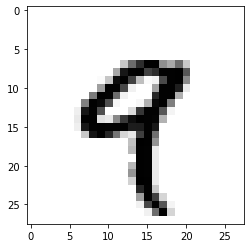

In [19]:
# 5번째 샘플을 확인
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()